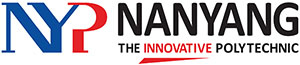

# Client Library

Previously, we have been able to perform vision detections using just an API key. In this exercise, we will use the Cloud Client Library (Python) with a service key to perform Vision and Video predictions.

Before we do that, we need to do some setup. Complete the following steps on your **PC/laptop**.

### Set up PC

1. Download the [Google Cloud CLI installer](https://dl.google.com/dl/cloudsdk/channels/rapid/GoogleCloudSDKInstaller.exe)
2. Double click to install the SDK

3. Click Next. 

4. Click "I Agree"
5. Use default installation path

6. Click "Next" when done

6. Check all the boxes and click "Finish"
7. The terminal window will auto launch gcloud init
8. Press Y

9. Your browser will launch. Sign in to your personal Google account. Agree to the terms of service.
10. Once done, press the Win button, search for <code>Google Cloud SDK Shell</code> and launch it
11. Type <code>gcloud auth list</code> to see your active account; it should be the account you have just logged in
12. Type <code>gcloud config list</code> to see some info on configuration

### Required files

Before you proceed, download the following data from Brightspace into the current directory:
- <code>it3386-2024-s2.json</code>: service key
- images from week 1 practical
- <code>oh_2021_short.mp4</code>

You should have also completed the Anaconda environment set up so that you can import the vison and video intelligence libraries. See the instructions on Brightspace.

Try performing a Vision Cloud Detection using the following codes.

In [ ]:
from google.cloud import vision
import io

In [ ]:
# refer to https://cloud.google.com/vision/docs/detecting-faces

def detect_faces(path):
    """Detects faces in an image."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.face_detection(image=image)
    faces = response.face_annotations

    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    print('Faces:')

    for face in faces:
        print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
        print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
        print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in face.bounding_poly.vertices])

        print('face bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(response.error.message))
    
    return response

In [ ]:
# ensure the image is present in the current folder
response = detect_faces('nyp_cafe.jpg')

> Are you able to get a response from the detection? What is the error?

### Set up environment

The service key that you downloaded will give you the rights to complete the detections. Place them in the same directory.

We will set up the GOOGLE_APPLICATION_CREDENTIALS env to link to the service key.

In [ ]:
# you should see the service key (json) in your current folder
!dir *.json

In [ ]:
# env should be empty 
%env GOOGLE_APPLICATION_CREDENTIALS

In [ ]:
# set the service key
%env GOOGLE_APPLICATION_CREDENTIALS=it3386-2024-s2.json

In [ ]:
%env GOOGLE_APPLICATION_CREDENTIALS

### Using Client Library for Vision

In [ ]:
response = detect_faces('nyp_cafe.jpg')

In [ ]:
print(response)

In [ ]:
def detect_landmarks(path):
    """Detects landmarks in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.landmark_detection(image=image)
    landmarks = response.landmark_annotations
    print('Landmarks:')

    for landmark in landmarks:
        print(landmark.description)
        for location in landmark.locations:
            lat_lng = location.lat_lng
            print('Latitude {}'.format(lat_lng.latitude))
            print('Longitude {}'.format(lat_lng.longitude))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(response.error.message))
        
    return response

In [ ]:
response = detect_landmarks('place.jpg')

In [ ]:
print(response)

In [ ]:
def detect_document(path):
    """Detects document features in an image."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.document_text_detection(image=image)

    for page in response.full_text_annotation.pages:
        for block in page.blocks:
            print('\nBlock confidence: {}\n'.format(block.confidence))

            for paragraph in block.paragraphs:
                print('Paragraph confidence: {}'.format(
                    paragraph.confidence))

                for word in paragraph.words:
                    word_text = ''.join([
                        symbol.text for symbol in word.symbols
                    ])
                    print('Word text: {} (confidence: {})'.format(
                        word_text, word.confidence))

                    for symbol in word.symbols:
                        print('\tSymbol: {} (confidence: {})'.format(
                            symbol.text, symbol.confidence))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(response.error.message))
    
    return response

In [ ]:
response = detect_document('note.jpg')

In [ ]:
print(response)

Todo

> How about detecting labels?

In [ ]:
# see https://cloud.google.com/vision/docs/labels

def detect_labels(path):

   

In [ ]:
detect_labels('nyp_cafe.jpg')

*Sample output:*

<pre>
Labels:
Leisure
Customer
T-shirt
Eyewear
Event
Fun
Water bottle
Belt
Job
Room
</pre>